In [ ]:
# Use spherical gaussian mixture to rperesent the events point cloud

The spherical Gaussian function is defined as:

$$f(ν) = a \exp(\lambda(ν⋅p - 1))$$

Where:
- $ν$ is the direction vector sampled on the sphere 
- $a$ is the amplitude
- $λ$ is the lobe sharpness 
- $p$ is the lobe axis



In [1]:
import numpy as np

def spherical_gaussian(ν, a, λ, p):
    return a * np.exp(λ * (np.dot(ν, p) - 1))

## Spherical Gaussian Point Cloud Representation (SGPCR)

The key idea is to represent a 3D point cloud using a mixture of spherical Gaussians. For each point $x_i$ in the point cloud $X$, we fit a spherical Gaussian with parameters $a_i, λ_i, p_i$.

The point cloud $X$ is then represented as:

$$X = \sum_{i=1}^{N} a_i \exp(\lambda_i(ν⋅p_i - 1))$$

Where $N$ is the number of points in the cloud.

## Rotation-Invariant SG Convolution

To make the representation robust to rotations, we define a rotation-invariant SG convolution. For two spherical Gaussians with parameters $(a_1, λ_1, p_1)$ and $(a_2, λ_2, p_2)$, the convolution is:

$$f(ν) = a_1 a_2 \exp(\frac{\lambda_1 + \lambda_2}{2}(ν⋅(p_1 + p_2) - 2))$$

The Python implementation:

In [2]:
def sg_convolution(a1, λ1, p1, a2, λ2, p2):
    p = p1 + p2
    p /= np.linalg.norm(p)
    return a1 * a2 * np.exp((λ1 + λ2) / 2 * (np.dot(ν, p) - 2))

In [2]:
import os
import numpy as np

def read_dataset(filename):
    """Reads in the TD events contained in the N-MNIST/N-CALTECH101 dataset file specified by 'filename'"""
    f = open(filename, 'rb')
    raw_data = np.fromfile(f, dtype=np.uint8)
    f.close()
    raw_data = np.uint32(raw_data)

    all_y = raw_data[1::5]
    all_x = raw_data[0::5]
    all_p = (raw_data[2::5] & 128) >> 7 #bit 7
    all_ts = ((raw_data[2::5] & 127) << 16) | (raw_data[3::5] << 8) | (raw_data[4::5])

    #Process time stamp overflow events
    time_increment = 2**13
    overflow_indices = np.where(all_y == 240)[0]
    for overflow_index in overflow_indices:
        all_ts[overflow_index:] += time_increment

    #Everything else is a proper td spike
    td_indices = np.where(all_y != 240)[0]

    return all_ts[td_indices], all_x[td_indices], all_y[td_indices], all_p[td_indices]

def read_ncaltech101(root_dir):
    """Reads the NCaltech101 dataset from the specified root directory"""
    data = []
    labels = []
    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith('.bin'):
                    file_path = os.path.join(class_dir, filename)
                    ts, x, y, p = read_dataset(file_path)
                    data.append((ts, x, y, p))
                    labels.append(class_name)
    
    return data, labels

# Example usage
root_dir = '../../datasets/N-Caltech101/Caltech101'
data, labels = read_ncaltech101(root_dir)

print(f"Total number of samples: {len(data)}")
print(f"Number of classes: {len(set(labels))}")

# Example of accessing the first sample
first_sample = data[0]
print(f"First sample - Timestamps: {first_sample[0].shape}, X: {first_sample[1].shape}, Y: {first_sample[2].shape}, Polarity: {first_sample[3].shape}")
print(f"First sample label: {labels[0]}")

Total number of samples: 8709
Number of classes: 101
First sample - Timestamps: (262215,), X: (262215,), Y: (262215,), Polarity: (262215,)
First sample label: gerenuk


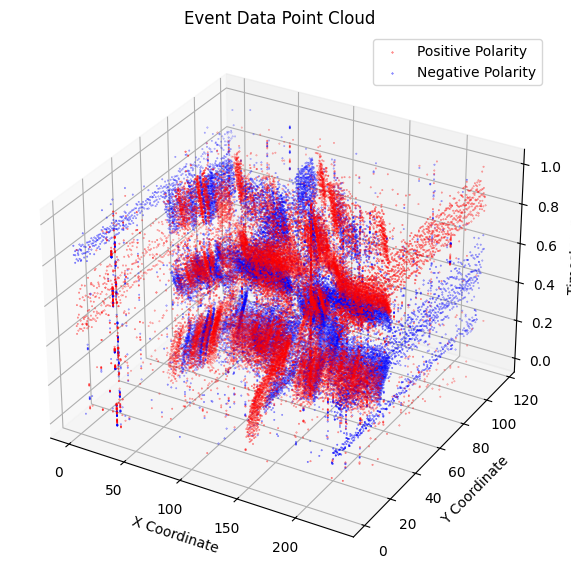

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 

In [3]:
# import data

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_event_data(x, y, ts, p, point_size=0.1):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot events with positive polarity in red
    ax.scatter(x[p == 1], y[p == 1], ts[p == 1], c='red', s=point_size, label='Positive Polarity')

    # Plot events with negative polarity in blue
    ax.scatter(x[p == 0], y[p == 0], ts[p == 0], c='blue', s=point_size, label='Negative Polarity')
    
    # Adding labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Timestamp')
    ax.set_title('Event Data Point Cloud')
    ax.legend()

    # Show plot
    plt.show()


# Example usage
file_path = '../../datasets/N-Caltech101/Caltech101/airplanes/image_0159.bin'
ts, x, y, p = read_dataset(file_path)
# Normalize the timestamps
ts = (ts - ts.min()) / (ts.max() - ts.min())
visualize_event_data(x, y, ts, p)

x_ = x.tolist()
y_ = y.tolist()
ts_ = ts.tolist()
p_ = p.tolist()

print(p_)



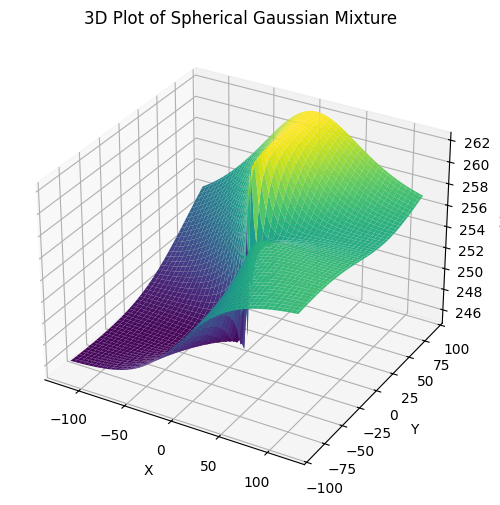

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the spherical Gaussian function
def spherical_gaussian(ν, a, λ, p):
    ν = ν / np.linalg.norm(ν)  # Normalize the direction vector
    return a * np.exp(λ * (np.dot(ν, p) - 1))

# Sample point cloud data
# x_ = np.random.uniform(-120, 120, 1000)  # Example data
# y_ = np.random.uniform(-90, 90, 1000)
# z_ = np.random.uniform(0, 1, 1000)

x = x_[15000:16000]
y = y_[15000:16000]
z = ts_[15000:16000]
point_cloud = np.array(list(zip(x, y, z)))

# Parameters for the spherical Gaussian mixture
a = np.random.uniform(0.5, 1.5, len(point_cloud))  # Random amplitudes
λ = np.random.uniform(1.0, 3.0, len(point_cloud))  # Random sharpness
p = np.random.randn(len(point_cloud), 3)  # Random directions

# Normalize p vectors
p = np.array([v / np.linalg.norm(v) for v in p])

# Generate a grid of points for visualization
x_range = np.linspace(-120, 120, 100)
y_range = np.linspace(-90, 90, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)  # Initialize Z values

# Compute Gaussian mixture values over the grid
for i in range(len(point_cloud)):
    for j in range(X.shape[0]):
        for k in range(X.shape[1]):
            ν = np.array([X[j, k], Y[j, k], 1])  # Use a fixed z value for visualization
            ν = ν / np.linalg.norm(ν)  # Normalize ν
            Z[j, k] += spherical_gaussian(ν, a[i], λ[i], p[i])

# Set up the 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot configuration
ax.set_title('3D Plot of Spherical Gaussian Mixture')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

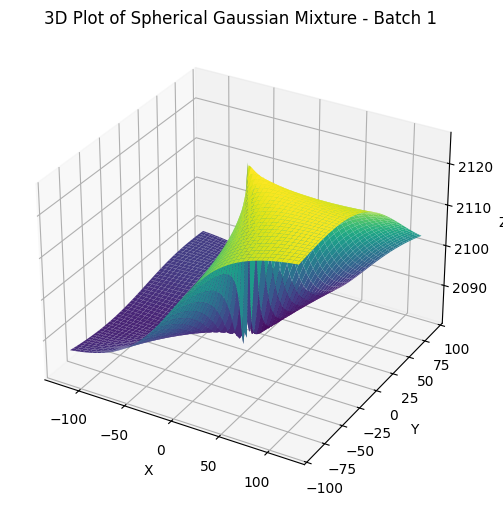

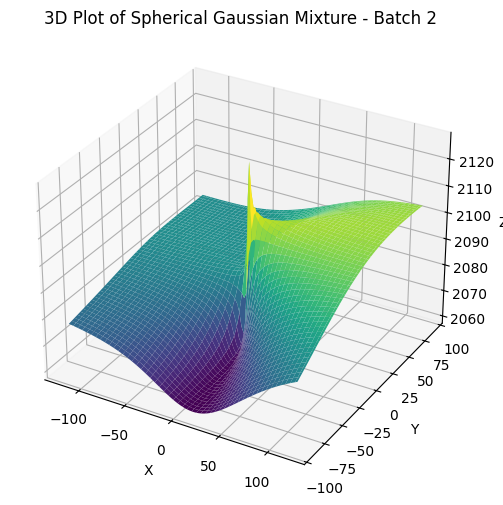

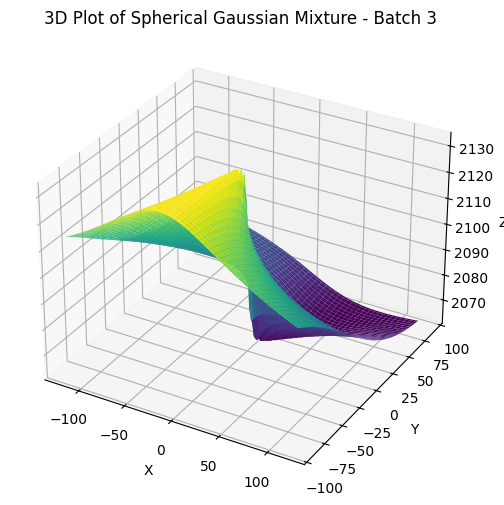

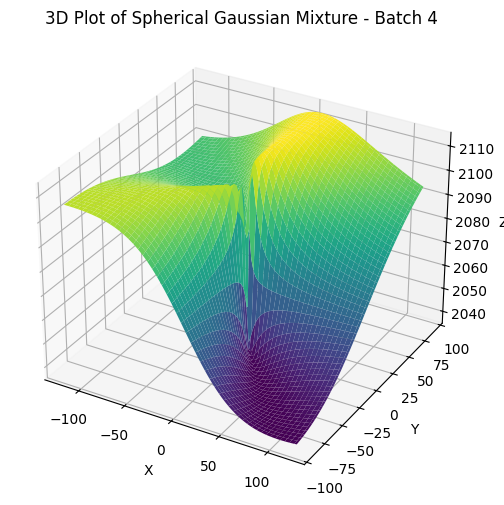

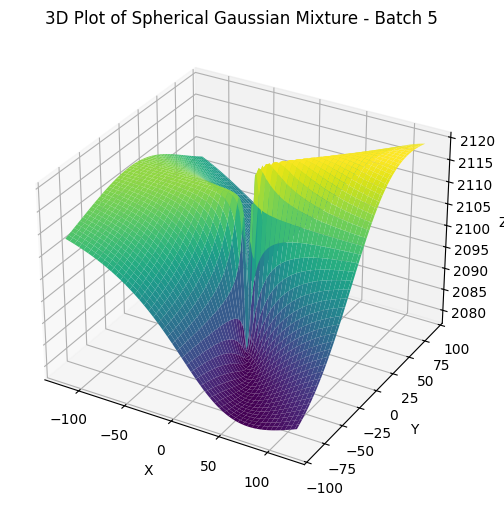

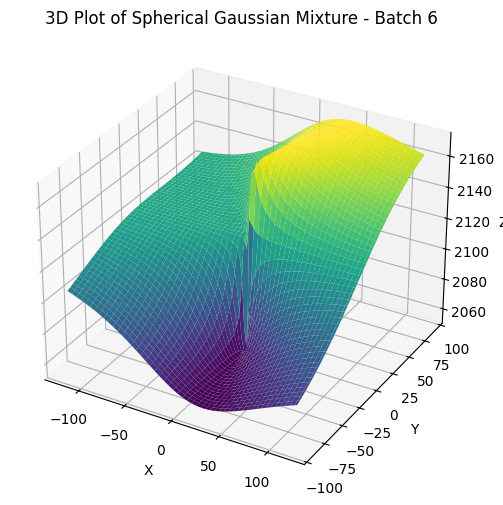

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_gaussian(ν, a, λ, p):
    ν = ν / np.linalg.norm(ν)
    return a * np.exp(λ * (np.dot(ν, p) - 1))

def process_batch(point_cloud, batch_size=1000):
    # Parameters for the spherical Gaussian mixture
    a = np.random.uniform(0.5, 1.5, len(point_cloud))
    λ = np.random.uniform(1.0, 3.0, len(point_cloud))
    p = np.random.randn(len(point_cloud), 3)
    p = np.array([v / np.linalg.norm(v) for v in p])

    # Generate a grid of points for visualization
    x_range = np.linspace(-120, 120, 100)
    y_range = np.linspace(-90, 90, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    # Compute Gaussian mixture values over the grid
    for i in range(len(point_cloud)):
        for j in range(X.shape[0]):
            for k in range(X.shape[1]):
                ν = np.array([X[j, k], Y[j, k], 1])
                ν = ν / np.linalg.norm(ν)
                Z[j, k] += spherical_gaussian(ν, a[i], λ[i], p[i])

    return X, Y, Z

def visualize_batch(X, Y, Z, batch_num):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(f'3D Plot of Spherical Gaussian Mixture - Batch {batch_num}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Main program
def main(x_, y_, ts_, batch_size=1000):
    total_points = len(x_)
    num_batches = total_points // batch_size

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size

        x = x_[start_idx:end_idx]
        y = y_[start_idx:end_idx]
        z = ts_[start_idx:end_idx]
        point_cloud = np.array(list(zip(x, y, z)))

        X, Y, Z = process_batch(point_cloud, batch_size)
        visualize_batch(X, Y, Z, i+1)

main(x_, y_, ts_, batch_size=8000)

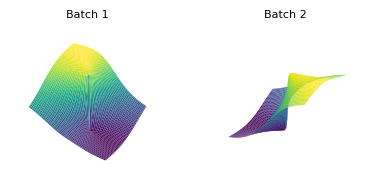

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_gaussian(ν, a, λ, p):
    ν = ν / np.linalg.norm(ν)
    return a * np.exp(λ * (np.dot(ν, p) - 1))

def process_batch(point_cloud, batch_size=1000):
    a = np.random.uniform(0.5, 1.5, len(point_cloud))
    λ = np.random.uniform(1.0, 3.0, len(point_cloud))
    p = np.random.randn(len(point_cloud), 3)
    p = np.array([v / np.linalg.norm(v) for v in p])

    x_range = np.linspace(-120, 120, 100)
    y_range = np.linspace(-90, 90, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(len(point_cloud)):
        for j in range(X.shape[0]):
            for k in range(X.shape[1]):
                ν = np.array([X[j, k], Y[j, k], 1])
                ν = ν / np.linalg.norm(ν)
                Z[j, k] += spherical_gaussian(ν, a[i], λ[i], p[i])

    return X, Y, Z

def visualize_batches(all_batches):
    num_batches = len(all_batches)
    rows = (num_batches + 9) // 10  # Calculate number of rows needed
    
    fig = plt.figure(figsize=(20, 2 * rows))  # Adjust figure size as needed
    
    for i, (X, Y, Z) in enumerate(all_batches):
        ax = fig.add_subplot(rows, 10, i + 1, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')
        ax.set_title(f'Batch {i+1}', fontsize=8)
        ax.axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

def main(x_, y_, ts_, batch_size=1000):
    total_points = len(x_)
    num_batches = total_points // batch_size
    all_batches = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size

        x = x_[start_idx:end_idx]
        y = y_[start_idx:end_idx]
        z = ts_[start_idx:end_idx]
        point_cloud = np.array(list(zip(x, y, z)))

        X, Y, Z = process_batch(point_cloud, batch_size)
        all_batches.append((X, Y, Z))

    visualize_batches(all_batches)

# Assuming x_, y_, and ts_ are your input data
main(x_, y_, ts_, batch_size=30000)

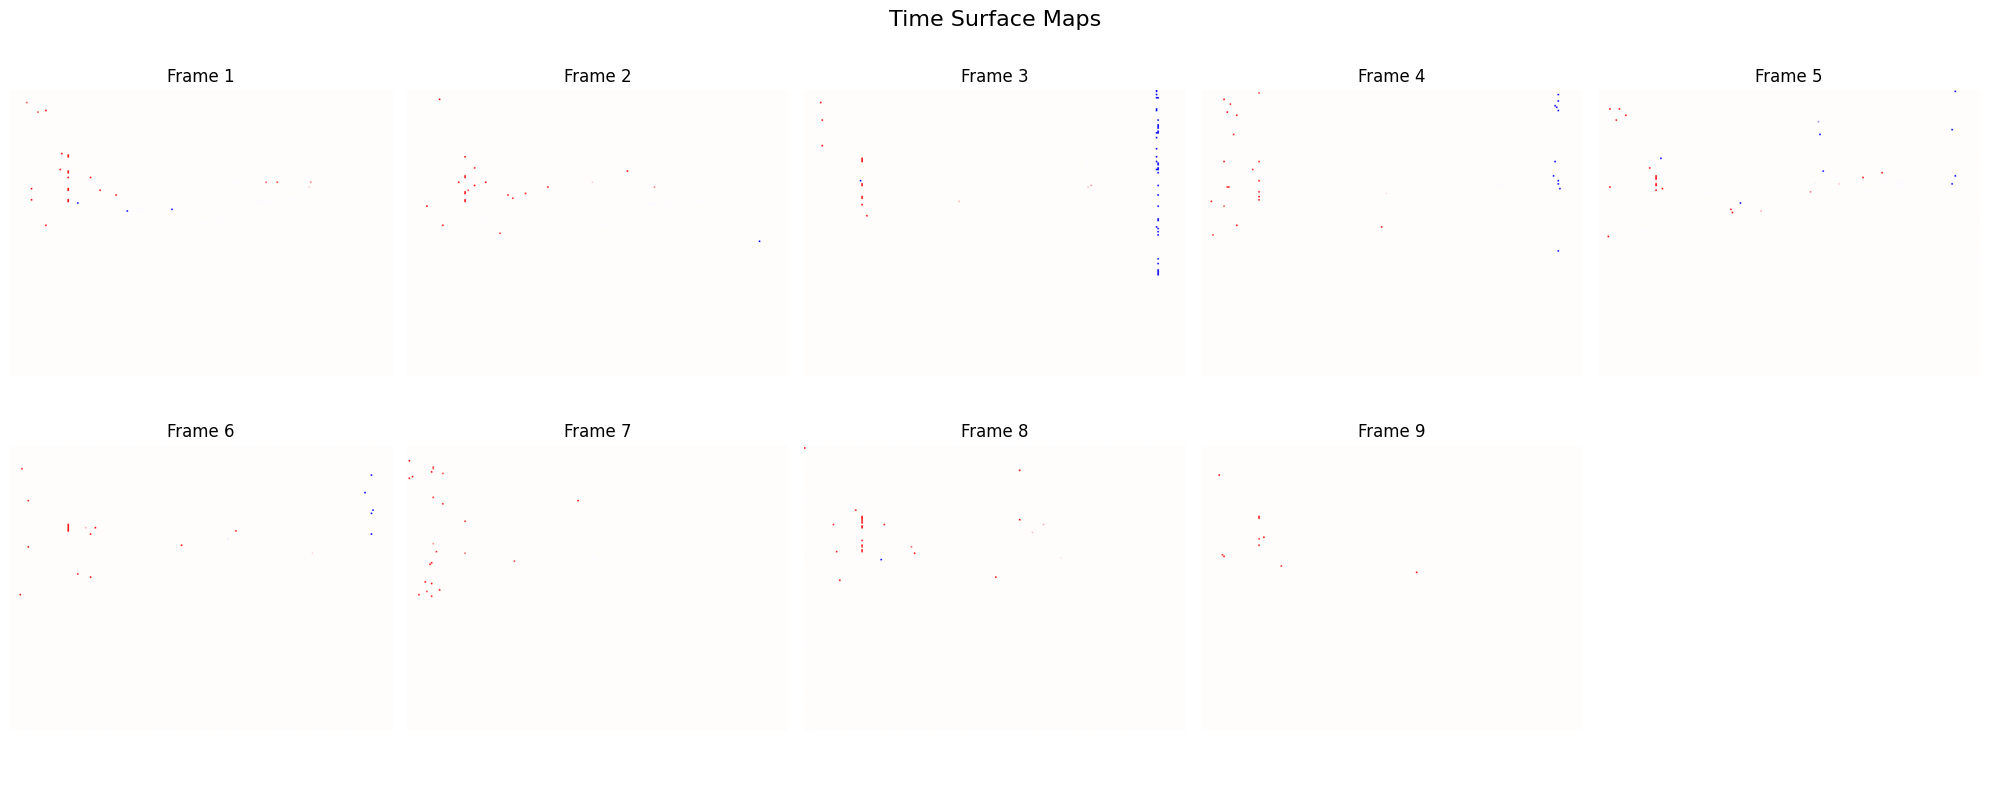

(180, 240)
Generated and displayed 9 frames


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math

def create_time_surface_map(x, y, ts, p, image_size=(180, 240), tau=60, batch_size=6000):
    # Sort events by timestamp
    sort_indices = np.argsort(ts)
    x, y, ts, p = x[sort_indices], y[sort_indices], ts[sort_indices], p[sort_indices]

    # Create custom colormap (blue to white to red)
    colors = ['blue', 'white', 'red']
    n_bins = 255
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

    frames = []
    for start in range(0, len(ts), batch_size):
        end = start + batch_size
        batch_x, batch_y = x[start:end], y[start:end]
        batch_ts, batch_p = ts[start:end], p[start:end]

        # Create time surface
        time_surface = np.zeros(image_size)
        latest_timestamp = np.zeros(image_size)

        for xi, yi, t, pol in zip(batch_x, batch_y, batch_ts, batch_p):
            if 0 <= xi < image_size[1] and 0 <= yi < image_size[0]:
                time_surface[yi, xi] = (2 * pol - 1) * np.exp(-(t - latest_timestamp[yi, xi]) / tau)
                latest_timestamp[yi, xi] = t

        # Normalize time surface to [-1, 1] range
        time_surface = np.clip(time_surface, -1, 1)
        frames.append(time_surface)

    return frames

# Example usage
file_path = '../../datasets/N-Caltech101/Caltech101/airplanes/image_0159.bin'
ts, x, y, p = read_dataset(file_path)

# Generate frames
frames = create_time_surface_map(x, y, ts, p)

# Display all frames
n_frames = len(frames)
n_cols = 5  # Number of columns in the grid
n_rows = math.ceil(n_frames / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
fig.suptitle('Time Surface Maps', fontsize=16)

# Create custom colormap (blue to white to red)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

for i, ax in enumerate(axes.flat):
    if i < n_frames:
        im = ax.imshow(frames[i], cmap=cmap, vmin=-1, vmax=1)
        ax.set_title(f'Frame {i+1}')
    ax.axis('off')


plt.tight_layout()
plt.show()

print(frames[0].shape)

print(f"Generated and displayed {n_frames} frames")

Selected events from 1 to 40000 have been written to selected_events.csv


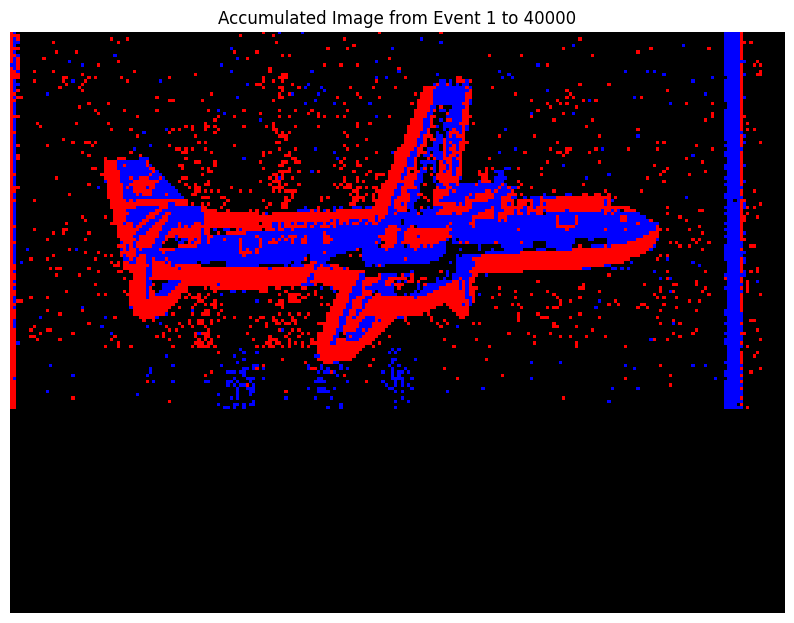

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import csv
import cv2
def create_accumulated_image(x, y, ts, p, m, n, image_size=(180, 240)):
    # Sort events by timestamp
    sort_indices = np.argsort(ts)
    x, y, ts, p = x[sort_indices], y[sort_indices], ts[sort_indices], p[sort_indices]

    # Select events from m to n
    x, y, ts, p = x[m:n], y[m:n], ts[m:n], p[m:n]

    # Create accumulated image
    accumulated_image = np.zeros(image_size, dtype=int)  # Initialize with zeros (black)

    for xi, yi, pol in zip(x, y, p):
        if 0 <= xi < image_size[1] and 0 <= yi < image_size[0]:
            accumulated_image[yi, xi] = 2 if pol == 1 else 1  # Red for p=1, Blue for p=0

    return accumulated_image, ts, x, y, p

# Example usage
# Assuming read_dataset function is defined elsewhere
file_path = '../../datasets/N-Caltech101/Caltech101/airplanes/image_0159.bin'
ts, x, y, p = read_dataset(file_path)



# Select events from m to n
m, n = 1, 40000

# Generate accumulated image for the selected events
accumulated_image, selected_ts, selected_x, selected_y, selected_p = create_accumulated_image(x, y, ts, p, m, n)

# Write selected events to a CSV file
csv_file_path = 'selected_events.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'X', 'Y', 'Polarity'])
    for t, xi, yi, pol in zip(selected_ts, selected_x, selected_y, selected_p):
        writer.writerow([t, xi, yi, pol])

print(f"Selected events from {m} to {n} have been written to {csv_file_path}")

# Create custom colormap (black for not appearing, blue for p=0, red for p=1)
colors = ['black', 'blue', 'red']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=3)

# Visualize the accumulated image
plt.figure(figsize=(10, 8))
plt.imshow(accumulated_image, cmap=cmap, vmin=0, vmax=2)
plt.title(f'Accumulated Image from Event {m} to {n}')
plt.axis('off')
plt.show()



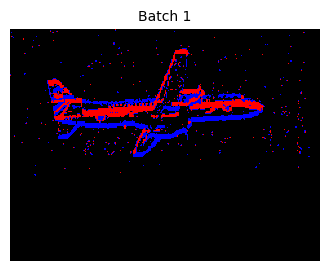

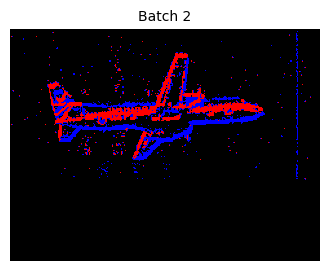

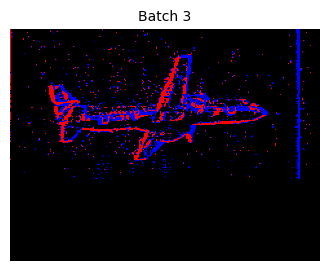

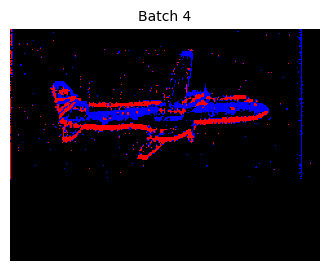

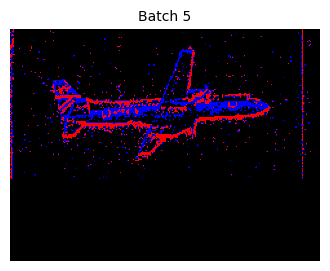

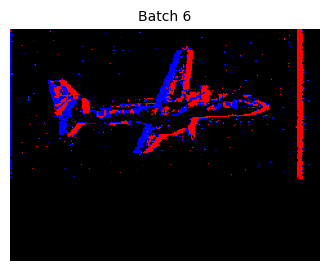

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_accumulated_image(x, y, ts, p, m, n, image_size=(180, 240)):
    sort_indices = np.argsort(ts)
    x, y, ts, p = x[sort_indices], y[sort_indices], ts[sort_indices], p[sort_indices]
    x, y, ts, p = x[m:n], y[m:n], ts[m:n], p[m:n]
    accumulated_image = np.zeros(image_size, dtype=int)
    for xi, yi, pol in zip(x, y, p):
        if 0 <= xi < image_size[1] and 0 <= yi < image_size[0]:
            accumulated_image[yi, xi] = 2 if pol == 1 else 1
    return accumulated_image

def process_batches(ts, x, y, p, batch_size=1000, image_size=(180, 240)):
    # Convert inputs to numpy arrays if they aren't already
    ts = np.array(ts)
    x = np.array(x)
    y = np.array(y)
    p = np.array(p)

    total_points = len(x)
    num_batches = total_points // batch_size
    accumulated_images = []

    for i in range(num_batches):
        m = i * batch_size
        n = m + batch_size
        accumulated_image = create_accumulated_image(x, y, ts, p, m, n, image_size)
        accumulated_images.append(accumulated_image)

    return accumulated_images

def visualize_accumulated_images(accumulated_images):
    num_images = len(accumulated_images)
    num_cols = min(num_images, 10)
    num_rows = (num_images - 1) // num_cols + 1
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 2, num_rows * 2))
    axes = axes.flatten() if num_rows > 1 else [axes]

    colors = ['black', 'blue', 'red']
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=3)

    for i, ax in enumerate(axes):
        if i < num_images:
            ax.imshow(accumulated_images[i], cmap=cmap, vmin=0, vmax=2)
            ax.set_title(f'Batch {i+1}', fontsize=8)
        ax.axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

def visualize_images_one_by_one(accumulated_images):
    colors = ['black', 'blue', 'red']
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=3)

    for i, image in enumerate(accumulated_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(image, cmap=cmap, vmin=0, vmax=2)
        plt.title(f'Batch {i+1}', fontsize=10)
        plt.axis('off')
        plt.show()



# Process in batches
batch_size = 8000
accumulated_images = process_batches(ts_, x_, y_, p_, batch_size)

# Visualize each accumulated image one by one
visualize_images_one_by_one(accumulated_images)

# # Visualize all accumulated images
# visualize_accumulated_images(accumulated_images)